In [ ]:
from pyspark.sql import SparkSession
sc = SparkSession.builder.appName('SparkSession').getOrCreate()

In [2]:
sc

In [96]:
df1 = sc.read.format('csv').load('data/2015-summary.csv', inferSchema = True, header = True)
df1

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: int]

In [97]:
df2 = sc.read.format('csv').load('data/2015-summary.csv', inferSchema = True, header = True)
df2

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: int]

In [3]:
df = sc.read.format('json').load('data/2015-summary.json', inferSchema = True, header = True)
df

DataFrame[DEST_COUNTRY_NAME: string, ORIGIN_COUNTRY_NAME: string, count: bigint]

In [4]:
df.schema

StructType(List(StructField(DEST_COUNTRY_NAME,StringType,true),StructField(ORIGIN_COUNTRY_NAME,StringType,true),StructField(count,LongType,true)))

### Row 클래스, 단일 레코드(행)을 나타내는 객체

Row(DEST_COUNTRY_NAME = 'United States', ORIGIN_COUNTRY_NAME = 'Romania', count 1 = 15)

In [18]:
df.printSchema()

root
 |-- DEST_COUNTRY_NAME: string (nullable = true)
 |-- ORIGIN_COUNTRY_NAME: string (nullable = true)
 |-- count: long (nullable = true)



In [6]:
df.take(5)

[Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Romania', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Croatia', count=1),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='Ireland', count=344),
 Row(DEST_COUNTRY_NAME='Egypt', ORIGIN_COUNTRY_NAME='United States', count=15),
 Row(DEST_COUNTRY_NAME='United States', ORIGIN_COUNTRY_NAME='India', count=62)]

In [70]:
df.show(5)

+-----------------+-------------------+-----+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+-----------------+-------------------+-----+
|    United States|            Romania|   15|
|    United States|            Croatia|    1|
|    United States|            Ireland|  344|
|            Egypt|      United States|   15|
|    United States|              India|   62|
+-----------------+-------------------+-----+
only showing top 5 rows



In [7]:
df.select('DEST_COUNTRY_NAME').show(5)

+-----------------+
|DEST_COUNTRY_NAME|
+-----------------+
|    United States|
|    United States|
|    United States|
|            Egypt|
|    United States|
+-----------------+
only showing top 5 rows



In [8]:
#spark DataTable
df.createOrReplaceTempView('mobility_data')

In [9]:
#spark SQL
sc.sql('select * from mobility_data').show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [74]:
df.count()

256

In [13]:
df1.select('DEST_COUNTRY_NAME').dropDuplicates() #중복 제거함

DataFrame[DEST_COUNTRY_NAME: string]

In [99]:
df1.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

In [100]:
df2.select('DEST_COUNTRY_NAME').dropDuplicates().cache() # cache로 메모리에 올려둠

DataFrame[DEST_COUNTRY_NAME: string]

In [101]:
df2.show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|       United States|            Romania|   15|
|       United States|            Croatia|    1|
|       United States|            Ireland|  344|
|               Egypt|      United States|   15|
|       United States|              India|   62|
|       United States|          Singapore|    1|
|       United States|            Grenada|   62|
|          Costa Rica|      United States|  588|
|             Senegal|      United States|   40|
|             Moldova|      United States|    1|
|       United States|       Sint Maarten|  325|
|       United States|   Marshall Islands|   39|
|              Guyana|      United States|   64|
|               Malta|      United States|    1|
|            Anguilla|      United States|   41|
|             Bolivia|      United States|   30|
|       United States|           Paraguay|    6|
|             Algeri

### cache 유무의 차이
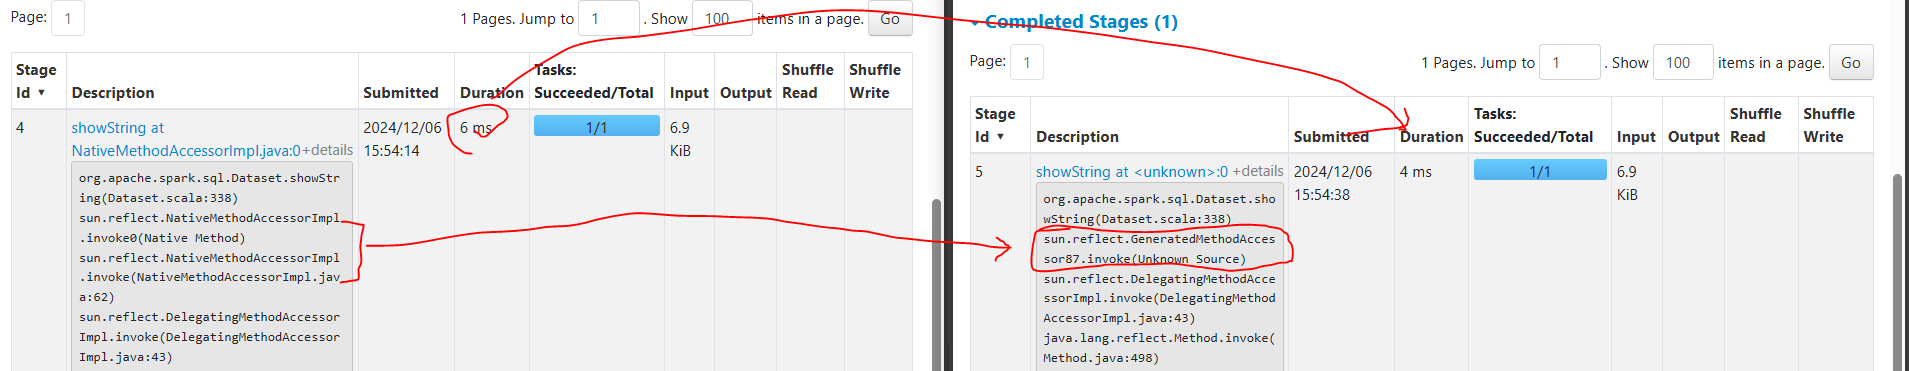


In [89]:
df.select('DEST_COUNTRY_NAME').dropDuplicates().cache().count() # cache로 메모리에 올려둠

24/12/06 15:50:04 WARN CacheManager: Asked to cache already cached data.


132

In [79]:
#distinct(wide Transformation)
# dropDuplicates보다 시간이 더 걸림
df.distinct().count()

256

In [14]:
df.sort('DEST_COUNTRY_NAME').show()

+--------------------+-------------------+-----+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|
+--------------------+-------------------+-----+
|             Algeria|      United States|    4|
|              Angola|      United States|   15|
|            Anguilla|      United States|   41|
| Antigua and Barbuda|      United States|  126|
|           Argentina|      United States|  180|
|               Aruba|      United States|  346|
|           Australia|      United States|  329|
|             Austria|      United States|   62|
|          Azerbaijan|      United States|   21|
|             Bahrain|      United States|   19|
|            Barbados|      United States|  154|
|             Belgium|      United States|  259|
|              Belize|      United States|  188|
|             Bermuda|      United States|  183|
|             Bolivia|      United States|   30|
|Bonaire, Sint Eus...|      United States|   58|
|              Brazil|      United States|  853|
|British Virgin Is..

In [16]:
from pyspark.sql.functions import expr
df4 = df1 \
.withColumn('withInCountry', \
                            expr('ORIGIN_COUNTRY_NAME==DEST_COUNTRY_NAME') \
           ) \

df4.show()

+--------------------+-------------------+-----+-------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|
+--------------------+-------------------+-----+-------------+
|       United States|            Romania|   15|        false|
|       United States|            Croatia|    1|        false|
|       United States|            Ireland|  344|        false|
|               Egypt|      United States|   15|        false|
|       United States|              India|   62|        false|
|       United States|          Singapore|    1|        false|
|       United States|            Grenada|   62|        false|
|          Costa Rica|      United States|  588|        false|
|             Senegal|      United States|   40|        false|
|             Moldova|      United States|    1|        false|
|       United States|       Sint Maarten|  325|        false|
|       United States|   Marshall Islands|   39|        false|
|              Guyana|      United States|   64|       

In [17]:
# SQL 구문 Case When > 수치형 변수 > 파생 변수
df5 = df4\
.withColumn('category', \
                expr(
                    """
                    CASE WHEN count < 10 Then 'under'
                         WHEN count >=10 Then 'upper'
                         END
                    """
                    )
           )\

df5.show()

+--------------------+-------------------+-----+-------------+--------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+--------------------+-------------------+-----+-------------+--------+
|       United States|            Romania|   15|        false|   upper|
|       United States|            Croatia|    1|        false|   under|
|       United States|            Ireland|  344|        false|   upper|
|               Egypt|      United States|   15|        false|   upper|
|       United States|              India|   62|        false|   upper|
|       United States|          Singapore|    1|        false|   under|
|       United States|            Grenada|   62|        false|   upper|
|          Costa Rica|      United States|  588|        false|   upper|
|             Senegal|      United States|   40|        false|   upper|
|             Moldova|      United States|    1|        false|   under|
|       United States|       Sint Maarten|  325|        false|  

### count 2배

In [129]:
df6 = df5\
.withColumn('double_count', expr(   
                """
                count
                """
                ) * 2
           )

df6.show()

+--------------------+-------------------+-----+-------------+--------+------------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|double_count|
+--------------------+-------------------+-----+-------------+--------+------------+
|       United States|            Romania|   15|        false|   upper|          30|
|       United States|            Croatia|    1|        false|   under|           2|
|       United States|            Ireland|  344|        false|   upper|         688|
|               Egypt|      United States|   15|        false|   upper|          30|
|       United States|              India|   62|        false|   upper|         124|
|       United States|          Singapore|    1|        false|   under|           2|
|       United States|            Grenada|   62|        false|   upper|         124|
|          Costa Rica|      United States|  588|        false|   upper|        1176|
|             Senegal|      United States|   40|        false|   

In [130]:
df6.groupBy('withinCountry').count().show()

+-------------+-----+
|withinCountry|count|
+-------------+-----+
|         true|    1|
|        false|  255|
+-------------+-----+



In [131]:
df6.groupBy('category').count().show()

+--------+-----+
|category|count|
+--------+-----+
|   under|   48|
|   upper|  208|
+--------+-----+



In [133]:
df6.groupBy('DEST_COUNTRY_NAME').count().show()

+--------------------+-----+
|   DEST_COUNTRY_NAME|count|
+--------------------+-----+
|            Anguilla|    1|
|              Russia|    1|
|            Paraguay|    1|
|             Senegal|    1|
|              Sweden|    1|
|            Kiribati|    1|
|              Guyana|    1|
|         Philippines|    1|
|            Djibouti|    1|
|            Malaysia|    1|
|           Singapore|    1|
|                Fiji|    1|
|              Turkey|    1|
|                Iraq|    1|
|             Germany|    1|
|              Jordan|    1|
|               Palau|    1|
|Turks and Caicos ...|    1|
|              France|    1|
|              Greece|    1|
+--------------------+-----+
only showing top 20 rows



### groupby 집계

### projection과 filter
```
select a,b,c #projection > column > Transformation select('colname')
from TableA
where a > 10 #filter Row > Transformation where('condition')
```

### category가 upper인 orgin_country_name별 평균 카운트

In [270]:
df5.where("category == 'upper'") \
.groupBy('ORIGIN_COUNTRY_NAME') \
.avg('count') \
.orderBy('avg(count)', ascending = False)\
.show()

+-------------------+----------+
|ORIGIN_COUNTRY_NAME|avg(count)|
+-------------------+----------+
|             Canada|    8483.0|
|             Mexico|    7187.0|
|      United States|    3923.0|
|     United Kingdom|    1970.0|
|              Japan|    1496.0|
| Dominican Republic|    1420.0|
|            Germany|    1336.0|
|        The Bahamas|     986.0|
|             France|     952.0|
|              China|     920.0|
|           Colombia|     867.0|
|        South Korea|     827.0|
|            Jamaica|     712.0|
|        Netherlands|     660.0|
|             Brazil|     619.0|
|         Costa Rica|     608.0|
|        El Salvador|     508.0|
|               Cuba|     478.0|
|             Panama|     465.0|
|              Spain|     442.0|
+-------------------+----------+
only showing top 20 rows



### 카운트가 200 이상인 orgin_country

In [271]:
df5\
.where('count >= 200') \
.groupBy('ORIGIN_COUNTRY_NAME')\
.count()\
.orderBy('count', ascending = False)\
.show()

+--------------------+-----+
| ORIGIN_COUNTRY_NAME|count|
+--------------------+-----+
|       United States|   39|
|             Germany|    1|
|Turks and Caicos ...|    1|
|              France|    1|
|              Taiwan|    1|
|             Belgium|    1|
|             Ecuador|    1|
|                Peru|    1|
|           Nicaragua|    1|
|               China|    1|
|              Mexico|    1|
|               Italy|    1|
|               Spain|    1|
|      Cayman Islands|    1|
|             Ireland|    1|
|              Panama|    1|
|           Hong Kong|    1|
|                Cuba|    1|
|           Venezuela|    1|
|         South Korea|    1|
+--------------------+-----+
only showing top 20 rows



### 국내 여행이 아니면서, 가장 횟수가 많은 orgin_country, top 10 추출
#### 아래 둘중 하나
1) origin 국가를 groupBy 하지 않는 경우
2) origin 국가를 groupBy 하는 경우

In [296]:
df5\
.where('withInCountry == False')\
.orderBy('count', ascending = False)\
.select(['ORIGIN_COUNTRY_NAME', 'count'])\
.limit(10)\
.show()

+-------------------+-----+
|ORIGIN_COUNTRY_NAME|count|
+-------------------+-----+
|             Canada| 8483|
|      United States| 8399|
|             Mexico| 7187|
|      United States| 7140|
|      United States| 2025|
|     United Kingdom| 1970|
|      United States| 1548|
|              Japan| 1496|
|      United States| 1468|
| Dominican Republic| 1420|
+-------------------+-----+



In [295]:
df5\
.where('withInCountry == False')\
.groupBy('ORIGIN_COUNTRY_NAME')\
.sum()\
.orderBy('sum(count)', ascending = False)\
.limit(10)\
.show()

+-------------------+----------+
|ORIGIN_COUNTRY_NAME|sum(count)|
+-------------------+----------+
|      United States|     41964|
|             Canada|      8483|
|             Mexico|      7187|
|     United Kingdom|      1970|
|              Japan|      1496|
| Dominican Republic|      1420|
|            Germany|      1336|
|        The Bahamas|       986|
|             France|       952|
|              China|       920|
+-------------------+----------+



### 국내 여행이 아니면서, 가장 횟수가 적은 orgin_country, top 10 추출
#### 아래 둘중 하나
1) origin 국가를 groupBy 하지 않는 경우
2) origin 국가를 groupBy 하는 경우

In [303]:
df5\
.where('withInCountry == False')\
.orderBy('count')\
.limit(10)\
.show()

+-----------------+-------------------+-----+-------------+--------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+-----------------+-------------------+-----+-------------+--------+
|         Suriname|      United States|    1|        false|   under|
|    United States|            Estonia|    1|        false|   under|
|    United States|             Cyprus|    1|        false|   under|
|    United States|            Croatia|    1|        false|   under|
|           Zambia|      United States|    1|        false|   under|
|          Moldova|      United States|    1|        false|   under|
|     Burkina Faso|      United States|    1|        false|   under|
|    United States|          Gibraltar|    1|        false|   under|
|         Djibouti|      United States|    1|        false|   under|
|    United States|          Singapore|    1|        false|   under|
+-----------------+-------------------+-----+-------------+--------+



In [274]:
df5\
.where('withInCountry == False')\
.groupBy('ORIGIN_COUNTRY_NAME')\
.sum() \
.orderBy(['sum(count)', 'ORIGIN_COUNTRY_NAME'], ascending = True)\
.limit(10)\
.show()

+-------------------+----------+
|ORIGIN_COUNTRY_NAME|sum(count)|
+-------------------+----------+
|            Bahrain|         1|
|           Bulgaria|         1|
|            Croatia|         1|
|             Cyprus|         1|
|            Estonia|         1|
|            Georgia|         1|
|          Gibraltar|         1|
|          Lithuania|         1|
|         Montenegro|         1|
|            Namibia|         1|
+-------------------+----------+



### 도착 국가별  총합이 가장 많은 top 10 추출

In [275]:
df5\
.groupBy('DEST_COUNTRY_NAME')\
.sum('count')\
.orderBy('sum(count)', ascending = False)\
.limit(10)\
.show()

+------------------+----------+
| DEST_COUNTRY_NAME|sum(count)|
+------------------+----------+
|     United States|    411352|
|            Canada|      8399|
|            Mexico|      7140|
|    United Kingdom|      2025|
|             Japan|      1548|
|           Germany|      1468|
|Dominican Republic|      1353|
|       South Korea|      1048|
|       The Bahamas|       955|
|            France|       935|
+------------------+----------+



### 시각화

In [392]:
#데이터 전처리
## Spark_DataFrame >> rdd >> dictionary
word_data = df5.select('DEST_COUNTRY_NAME').rdd.countByKey()
country_list = list(df5.select('DEST_COUNTRY_NAME').rdd.countByKey().keys())[:21]
value_list = list(df5.select('DEST_COUNTRY_NAME').rdd.countByKey().values())[:21]

# ## Spark_DataFrame >> pandas >> dict
# df5.select('DEST_COUNTRY_NAME').toPandas()['DEST_COUNTRY_NAME'].to_dict()

In [311]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

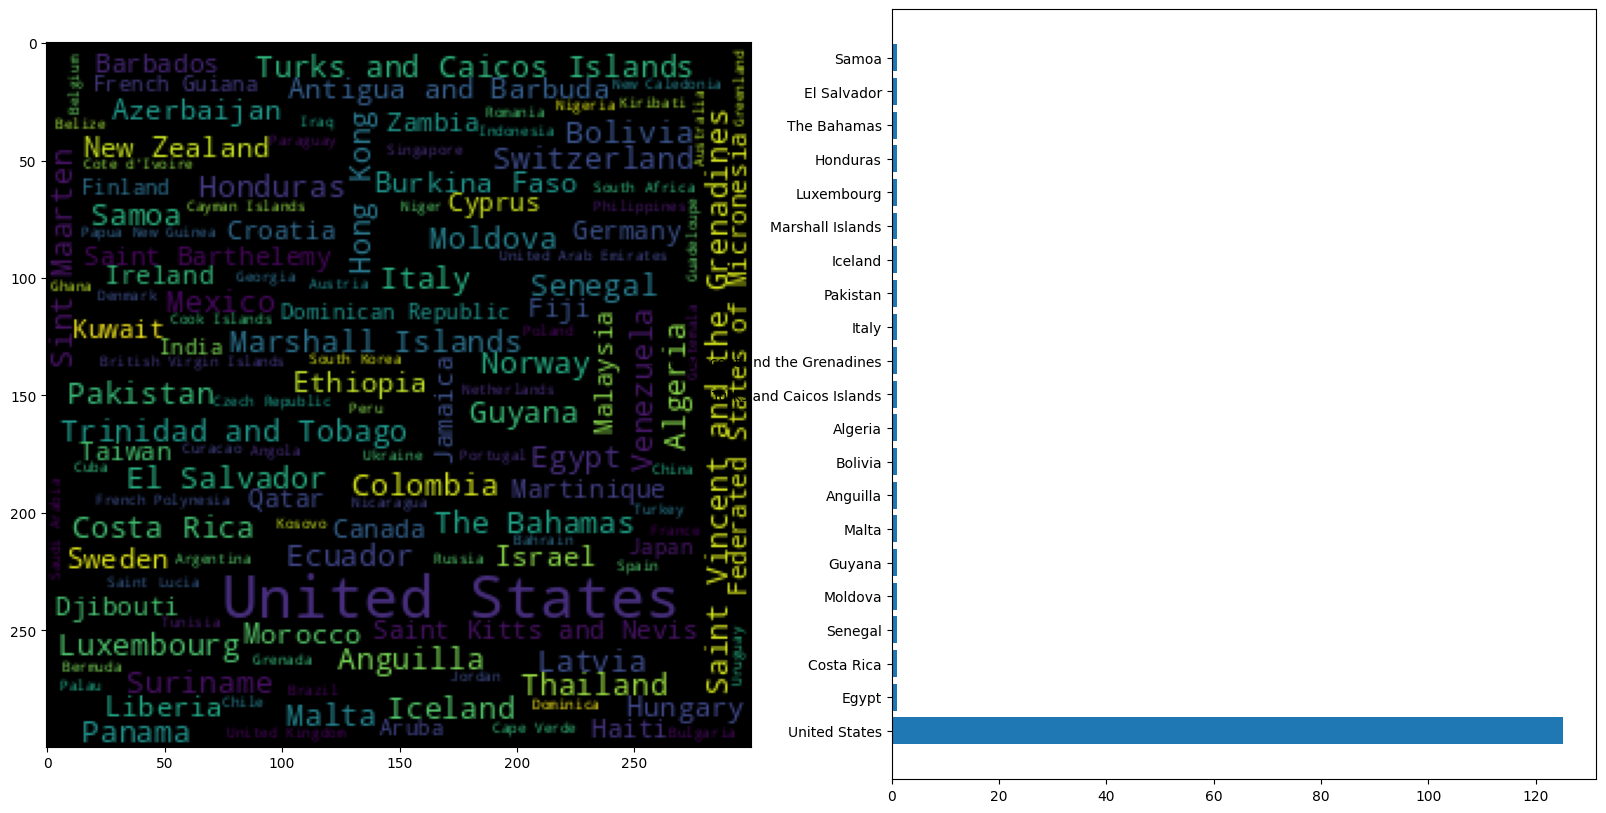

In [393]:
plt.figure(figsize=(20,10))
axes1 = plt.subplot(1,2,1)
axes2 = plt.subplot(1,2,2)

wc = WordCloud(width = 300, height = 300).generate_from_frequencies(word_data)
axes1.imshow(wc)
axes2.barh(country_list, value_list)

plt.show()

In [19]:
sc.stop()

### 집계 함수

In [20]:
from pyspark.sql import SparkSession
sc = SparkSession.builder.appName('SC').getOrCreate()

In [21]:
sc

In [40]:
dept = sc.read.format('csv')\
    .option('header', 'true')\
    .option('inferSchema', 'true')\
    .load('data/dept.csv')

emp = sc.read.format('csv')\
    .option('header', 'true')\
    .option('inferSchema', 'true')\
    .load('data/emp.csv')

In [41]:
dept.show(5), emp.show(5)

+------+----------+--------+
|deptno|     dname|     loc|
+------+----------+--------+
|    10|ACCOUNTING|NEW YORK|
|    20|  RESEARCH|  DALLAS|
|    30|     SALES| CHICAGO|
|    40|OPERATIONS|  BOSTON|
+------+----------+--------+

+-----+------+--------+----+----------+----+----+------+
|empno| ename|     job| mgr|  hiredate| sal|comm|deptno|
+-----+------+--------+----+----------+----+----+------+
| 7369| SMITH|   CLERK|7902|1980-12-17| 800|null|    20|
| 7499| ALLEN|SALESMAN|7698|1981-02-20|1600| 300|    30|
| 7521|  WARD|SALESMAN|7698|1981-02-22|1250| 500|    30|
| 7566| JONES| MANAGER|7839|1981-04-02|2975|null|    20|
| 7654|MARTIN|SALESMAN|7698|1981-09-28|1250|1400|    30|
+-----+------+--------+----+----------+----+----+------+
only showing top 5 rows



(None, None)

In [42]:
dept.printSchema()

root
 |-- deptno: integer (nullable = true)
 |-- dname: string (nullable = true)
 |-- loc: string (nullable = true)



In [44]:
dept.select('deptno', 'dname').show()

+------+----------+
|deptno|     dname|
+------+----------+
|    10|ACCOUNTING|
|    20|  RESEARCH|
|    30|     SALES|
|    40|OPERATIONS|
+------+----------+



In [46]:
dept.select('deptno')\
.where('deptno=20')\
.show()

+------+
|deptno|
+------+
|    20|
+------+



In [67]:
from pyspark.sql.functions import count, countDistinct, approx_count_distinct

# count 집계 => 컬럼 count는 NULL 제외
emp.select(count('job')).show()

+----------+
|count(job)|
+----------+
|        15|
+----------+



In [55]:
# selectExpr : select + Expr
# count(*) => NULL 포함
emp.selectExpr('count(*)').show()

+--------+
|count(1)|
+--------+
|      15|
+--------+



In [56]:
emp.select('job').distinct().show()

+---------+
|      job|
+---------+
|  ANALYST|
| SALESMAN|
|    CLERK|
|  MANAGER|
|PRESIDENT|
+---------+



In [65]:
print(
    emp.select('job').distinct().count() #정확히 몇개인지 알고 싶을때
)

print(
emp.select(countDistinct('job')).distinct().show() # 성능은 이게 더 좋음
)

print(
emp.select(approx_count_distinct('job', 0.1)).distinct().show() # 근사치임
)

5


+-------------------+
|count(DISTINCT job)|
+-------------------+
|                  5|
+-------------------+

None
+--------------------------+
|approx_count_distinct(job)|
+--------------------------+
|                         5|
+--------------------------+

None


In [180]:
from pyspark.sql.functions import first, last, min, max, sum, col, avg, round, stddev
# https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.skewness.html

In [72]:
emp.select(first('ename'), last('ename')).show()

+------------+-----------+
|first(ename)|last(ename)|
+------------+-----------+
|       SMITH|       JACK|
+------------+-----------+



In [78]:
emp.select(min('ename'), max('ename')).show()
emp.select(min('empno'), max('empno')).show()

+----------+----------+
|min(ename)|max(ename)|
+----------+----------+
|     ADAMS|      WARD|
+----------+----------+

+----------+----------+
|min(empno)|max(empno)|
+----------+----------+
|      7369|      9292|
+----------+----------+



In [79]:
emp.select(count('empno'), count('*'), max('ename'), min('ename')).show()

+------------+--------+----------+----------+
|count(empno)|count(1)|max(ename)|min(ename)|
+------------+--------+----------+----------+
|          15|      15|      WARD|     ADAMS|
+------------+--------+----------+----------+



In [84]:
emp.select(sum('sal')).show() #salary 컬럼의 총합

+--------+
|sum(sal)|
+--------+
|   32225|
+--------+



In [109]:
#sal 컬럼의 중복 제거 후 합산
# 방법1
emp.select('sal').distinct().select(sum(col('sal'))).show()

# 방법2
emp.selectExpr('sum ( distinct(sal))').show()

+--------+
|sum(sal)|
+--------+
|   27975|
+--------+

+-----------------+
|sum(DISTINCT sal)|
+-----------------+
|            27975|
+-----------------+



+--------+
|sum(sal)|
+--------+
|   27975|
+--------+



### alias

In [127]:
emp.select(
                count('sal').alias('total_tx'),
                sum('sal').alias('total_salary'),
                 round(avg('sal'),2).alias('avg_salary'),
                 expr('round(mean(sal),2)').alias('mean_salary') #SQL에서 평균을 계산해서 가져옴
                )\
.show()

+--------+------------+----------+-----------+
|total_tx|total_salary|avg_salary|mean_salary|
+--------+------------+----------+-----------+
|      15|       32225|   2148.33|    2148.33|
+--------+------------+----------+-----------+



### 그룹화

In [147]:
emp\
.groupBy('job')\
.count()\
.show()

+---------+-----+
|      job|count|
+---------+-----+
|  ANALYST|    2|
| SALESMAN|    4|
|    CLERK|    5|
|  MANAGER|    3|
|PRESIDENT|    1|
+---------+-----+



In [153]:
# agg() : 집계함수 적용
emp\
.groupBy('job')\
.agg(avg('sal')).alias('test')\
.show()

+---------+------------------+
|      job|          avg(sal)|
+---------+------------------+
|  ANALYST|            3000.0|
| SALESMAN|            1400.0|
|    CLERK|            1470.0|
|  MANAGER|2758.3333333333335|
|PRESIDENT|            5000.0|
+---------+------------------+



In [156]:
# 보통 SQL을 적어서 많이 가져옴
emp\
.groupBy('job')\
.agg(expr('avg(sal) as SAL_AVG'))\
.show()

+---------+------------------+
|      job|           SAL_AVG|
+---------+------------------+
|  ANALYST|            3000.0|
| SALESMAN|            1400.0|
|    CLERK|            1470.0|
|  MANAGER|2758.3333333333335|
|PRESIDENT|            5000.0|
+---------+------------------+



In [179]:
# salary 표준편차
#방법1(sql.function)
emp\
.agg(round(stddev_pop('sal'),2))\
.show()


#방법2(sql expression)
emp\
.agg(expr('round(stddev_pop(sal),2)'))\
.show()

+-------------------------+
|round(stddev_pop(sal), 2)|
+-------------------------+
|                  1136.17|
+-------------------------+

+-------------------------+
|round(stddev_pop(sal), 2)|
+-------------------------+
|                  1136.17|
+-------------------------+



##### stddev_pop
모표준편차

##### stddev
표본표준편차

### 윈도우 함수
- 순위 / 정렬 : rank, row_number, dense_rank
- 누계 : sum, avg, max, min, + over()
- 이동평균, 이동합계 : over + rowsBetween, rangeBetween
- 시차, 선행 = lag, lead  
ex) 세션 구간 내, 분석/특정 시간 동안 일어난 활동 그룹화

1. partitionBy() > 소그룹으로 나눈다.
2. orderBy() > 소그룹 내 정렬
3. rowBetween(), rangeBetween()
4. over()

In [196]:
from pyspark.sql.window import Window
from pyspark.sql.functions import desc, rank

# 순위를 부여하려고 하는 데이터의 범위 > 윈도우 명세 설정
ws = Window.orderBy(desc('sal'))
ws

In [193]:
salAllRank = rank().over(ws)
salAllRank

Column<'RANK() OVER (ORDER BY sal DESC NULLS LAST unspecifiedframe$())'>

In [202]:
# 데이터 프레임에 컬럼으로 추가 후 Action
# 실제 emp에는 반영안됨
emp.withColumn('salary_rank', salAllRank, ).show()

+-----+------+---------+----+----------+----+----+------+-----------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|salary_rank|
+-----+------+---------+----+----------+----+----+------+-----------+
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|          1|
| 9292|  JACK|    CLERK|7782|1982-01-23|3200|null|    70|          2|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|          3|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|          3|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|          5|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|          6|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|          7|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|          8|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500|   0|    30|          9|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|         10|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|         11|
| 7654|MARTIN| SALES

24/12/09 13:41:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [214]:
emp.select('empno', 'sal', salAllRank\
           .alias('salary_rank')
          )\
.show()

+-----+----+-----------+
|empno| sal|salary_rank|
+-----+----+-----------+
| 7839|5000|          1|
| 9292|3200|          2|
| 7788|3000|          3|
| 7902|3000|          3|
| 7566|2975|          5|
| 7698|2850|          6|
| 7782|2450|          7|
| 7499|1600|          8|
| 7844|1500|          9|
| 7934|1300|         10|
| 7521|1250|         11|
| 7654|1250|         11|
| 7876|1100|         13|
| 7900| 950|         14|
| 7369| 800|         15|
+-----+----+-----------+



24/12/09 13:45:31 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [226]:
ws2 = Window.partitionBy('job').orderBy(desc('sal'))
ws2

In [231]:
rank().over(ws2)
row_number().over(ws2)
dense_rank().over(ws2)

Column<'DENSE_RANK() OVER (PARTITION BY job ORDER BY sal DESC NULLS LAST unspecifiedframe$())'>

In [225]:
emp.select('job', 'ename', 'sal',           
           rank().over(ws2).alias('test')
          )\
.show()

+---------+------+----+----+
|      job| ename| sal|test|
+---------+------+----+----+
|  ANALYST| SCOTT|3000|   1|
|  ANALYST|  FORD|3000|   1|
| SALESMAN| ALLEN|1600|   1|
| SALESMAN|TURNER|1500|   2|
| SALESMAN|  WARD|1250|   3|
| SALESMAN|MARTIN|1250|   3|
|    CLERK|  JACK|3200|   1|
|    CLERK|MILLER|1300|   2|
|    CLERK| ADAMS|1100|   3|
|    CLERK| JAMES| 950|   4|
|    CLERK| SMITH| 800|   5|
|  MANAGER| JONES|2975|   1|
|  MANAGER| BLAKE|2850|   2|
|  MANAGER| CLARK|2450|   3|
|PRESIDENT|  KING|5000|   1|
+---------+------+----+----+



In [232]:
emp.show()

+-----+------+---------+----+----------+----+----+------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|
+-----+------+---------+----+----------+----+----+------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|
| 7521|  WARD| SALESMAN|7698|1981-02-22|1250| 500|    30|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|
| 7654|MARTIN| SALESMAN|7698|1981-09-28|1250|1400|    30|
| 7698| BLAKE|  MANAGER|7839|1981-05-01|2850|null|    30|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|
| 7844|TURNER| SALESMAN|7698|1981-09-08|1500|   0|    30|
| 7876| ADAMS|    CLERK|7788|1987-05-23|1100|null|    20|
| 7900| JAMES|    CLERK|7698|1981-12-03| 950|null|    30|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|
| 9292|  JACK|

In [255]:
# 부서별 급여 순위 생성
emp.select('deptno', 'ename',\
    rank().over(Window.partitionBy('deptno').orderBy(desc('sal')))\
           .alias('deptno/sal_rank')
          )\
.orderBy('deptno', 'deptno/sal_rank')\
.show()


+------+------+---------------+
|deptno| ename|deptno/sal_rank|
+------+------+---------------+
|    10|  KING|              1|
|    10| CLARK|              2|
|    10|MILLER|              3|
|    20|  FORD|              1|
|    20| SCOTT|              1|
|    20| JONES|              3|
|    20| ADAMS|              4|
|    20| SMITH|              5|
|    30| BLAKE|              1|
|    30| ALLEN|              2|
|    30|TURNER|              3|
|    30|  WARD|              4|
|    30|MARTIN|              4|
|    30| JAMES|              6|
|    70|  JACK|              1|
+------+------+---------------+



In [259]:
# row_number
emp.select('deptno', 'ename',\
    row_number().over(Window.partitionBy('deptno').orderBy(desc('sal')))\
           .alias('deptno/sal_rank')
          )\
.orderBy('deptno', 'deptno/sal_rank')\
.show()


+------+------+---------------+
|deptno| ename|deptno/sal_rank|
+------+------+---------------+
|    10|  KING|              1|
|    10| CLARK|              2|
|    10|MILLER|              3|
|    20| SCOTT|              1|
|    20|  FORD|              2|
|    20| JONES|              3|
|    20| ADAMS|              4|
|    20| SMITH|              5|
|    30| BLAKE|              1|
|    30| ALLEN|              2|
|    30|TURNER|              3|
|    30|  WARD|              4|
|    30|MARTIN|              5|
|    30| JAMES|              6|
|    70|  JACK|              1|
+------+------+---------------+



In [260]:
# dense_rank
emp.select('deptno', 'ename',\
    dense_rank().over(Window.partitionBy('deptno').orderBy(desc('sal')))\
           .alias('deptno/sal_rank')
          )\
.orderBy('deptno', 'deptno/sal_rank')\
.show()


+------+------+---------------+
|deptno| ename|deptno/sal_rank|
+------+------+---------------+
|    10|  KING|              1|
|    10| CLARK|              2|
|    10|MILLER|              3|
|    20| SCOTT|              1|
|    20|  FORD|              1|
|    20| JONES|              2|
|    20| ADAMS|              3|
|    20| SMITH|              4|
|    30| BLAKE|              1|
|    30| ALLEN|              2|
|    30|TURNER|              3|
|    30|MARTIN|              4|
|    30|  WARD|              4|
|    30| JAMES|              5|
|    70|  JACK|              1|
+------+------+---------------+



In [293]:
# 누적 급여 계산
emp.select('deptno',\
           'ename',\
        sum('sal').over(Window.partitionBy('deptno').orderBy(desc('sal')))\
           .alias('cum_salary')
          )\
.orderBy('deptno', desc('cum_salary'))\
.show()



+------+------+----------+
|deptno| ename|cum_salary|
+------+------+----------+
|    10|MILLER|      8750|
|    10| CLARK|      7450|
|    10|  KING|      5000|
|    20| SMITH|     10875|
|    20| ADAMS|     10075|
|    20| JONES|      8975|
|    20|  FORD|      6000|
|    20| SCOTT|      6000|
|    30| JAMES|      9400|
|    30|  WARD|      8450|
|    30|MARTIN|      8450|
|    30|TURNER|      5950|
|    30| ALLEN|      4450|
|    30| BLAKE|      2850|
|    70|  JACK|      3200|
+------+------+----------+



In [311]:
from pyspark.sql.functions import avg
# 부서별 평균급여 avg(sal)
emp.withColumn('avg(sal)',\
               round(avg('sal').over(Window.partitionBy('deptno')),2)
              )\
.select('deptno', 'avg(sal)')\
.orderBy('deptno', desc('avg(sal)'))\
.show()

+------+--------+
|deptno|avg(sal)|
+------+--------+
|    10| 2916.67|
|    10| 2916.67|
|    10| 2916.67|
|    20|  2175.0|
|    20|  2175.0|
|    20|  2175.0|
|    20|  2175.0|
|    20|  2175.0|
|    30| 1566.67|
|    30| 1566.67|
|    30| 1566.67|
|    30| 1566.67|
|    30| 1566.67|
|    30| 1566.67|
|    70|  3200.0|
+------+--------+



In [314]:
# 부서별 평균 급여
emp.select('deptno',\
        round(avg('sal').over(Window.partitionBy('deptno')),2)\
           .alias('avg_salary')
          )\
.orderBy(desc('avg_salary'))\
.show()



+------+----------+
|deptno|avg_salary|
+------+----------+
|    70|    3200.0|
|    10|   2916.67|
|    10|   2916.67|
|    10|   2916.67|
|    20|    2175.0|
|    20|    2175.0|
|    20|    2175.0|
|    20|    2175.0|
|    20|    2175.0|
|    30|   1566.67|
|    30|   1566.67|
|    30|   1566.67|
|    30|   1566.67|
|    30|   1566.67|
|    30|   1566.67|
+------+----------+



### 선생님 코드

In [268]:
sum_ws = Window.partitionBy('deptno').orderBy('empno')
sum_ws

In [271]:
new_emp = emp.withColumn('cum_salary', sum('sal').over(sum_ws))
new_emp.select(
    'ename','deptno','sal','cum_salary'
).show()


+------+------+----+----------+
| ename|deptno| sal|cum_salary|
+------+------+----+----------+
| SMITH|    20| 800|       800|
| JONES|    20|2975|      3775|
| SCOTT|    20|3000|      6775|
| ADAMS|    20|1100|      7875|
|  FORD|    20|3000|     10875|
| CLARK|    10|2450|      2450|
|  KING|    10|5000|      7450|
|MILLER|    10|1300|      8750|
|  JACK|    70|3200|      3200|
| ALLEN|    30|1600|      1600|
|  WARD|    30|1250|      2850|
|MARTIN|    30|1250|      4100|
| BLAKE|    30|2850|      6950|
|TURNER|    30|1500|      8450|
| JAMES|    30| 950|      9400|
+------+------+----+----------+



In [308]:
avg_window_spec = Window.partitionBy('deptno')

In [310]:
new_emp = emp.withColumn('dept_avg_salary', avg('sal').over(avg_window_spec))
new_emp.show()

+-----+------+---------+----+----------+----+----+------+------------------+
|empno| ename|      job| mgr|  hiredate| sal|comm|deptno|   dept_avg_salary|
+-----+------+---------+----+----------+----+----+------+------------------+
| 7369| SMITH|    CLERK|7902|1980-12-17| 800|null|    20|            2175.0|
| 7566| JONES|  MANAGER|7839|1981-04-02|2975|null|    20|            2175.0|
| 7788| SCOTT|  ANALYST|7566|1987-04-19|3000|null|    20|            2175.0|
| 7876| ADAMS|    CLERK|7788|1987-05-23|1100|null|    20|            2175.0|
| 7902|  FORD|  ANALYST|7566|1981-12-03|3000|null|    20|            2175.0|
| 7782| CLARK|  MANAGER|7839|1981-06-09|2450|null|    10|2916.6666666666665|
| 7839|  KING|PRESIDENT|null|1981-11-17|5000|null|    10|2916.6666666666665|
| 7934|MILLER|    CLERK|7782|1982-01-23|1300|null|    10|2916.6666666666665|
| 9292|  JACK|    CLERK|7782|1982-01-23|3200|null|    70|            3200.0|
| 7499| ALLEN| SALESMAN|7698|1981-02-20|1600| 300|    30|1566.6666666666667|

### SQL 문
```
SELECT
    ename
    , ename
    , deptno
    , sal,
    , avg('sal').over(partition by deptno) as dept_avg_salary
from emp;
```

In [325]:
#lag, lead 이전 급여, 이후 급여
from pyspark.sql.functions import lag, lead
row_window_spec = Window.partitionBy('deptno').orderBy('empno')

lead_lag_sal_df = emp.withColumn('prev_salary', lag('sal').over(row_window_spec))\
            .withColumn('next_salary', lead('sal').over(row_window_spec))
                        
lead_lag_sal_df.select('ename', 'deptno', 'sal', 'prev_salary', 'next_salary').show()

+------+------+----+-----------+-----------+
| ename|deptno| sal|prev_salary|next_salary|
+------+------+----+-----------+-----------+
| SMITH|    20| 800|       null|       2975|
| JONES|    20|2975|        800|       3000|
| SCOTT|    20|3000|       2975|       1100|
| ADAMS|    20|1100|       3000|       3000|
|  FORD|    20|3000|       1100|       null|
| CLARK|    10|2450|       null|       5000|
|  KING|    10|5000|       2450|       1300|
|MILLER|    10|1300|       5000|       null|
|  JACK|    70|3200|       null|       null|
| ALLEN|    30|1600|       null|       1250|
|  WARD|    30|1250|       1600|       1250|
|MARTIN|    30|1250|       1250|       2850|
| BLAKE|    30|2850|       1250|       1500|
|TURNER|    30|1500|       2850|        950|
| JAMES|    30| 950|       1500|       null|
+------+------+----+-----------+-----------+



SQL문
```
SELECT

    ename
    , deptno
    , sal
    , LAG(sal) OVER (partition by deptno order by empno) as prev_salary
    , LEAD(sal) OVER (patition by deptno order by empno) as next_salary

from emp;
```

### rollup / cube
over(), groupby() > 집계를 위한 연산
  
마찬가지로  
#### rollup 전체 그룹을 만들어서 각각의 부분합을 만듦 ( 계층적 집계, 부분합(subtotal), 총합(grandtotal)
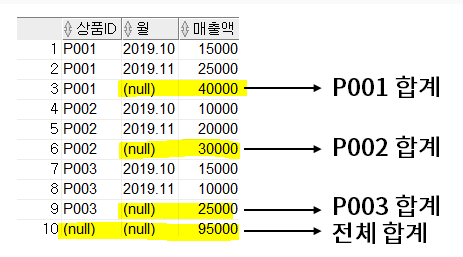

#### cube : 모든 값으로 부분합, 결합 가능한 모든 값의 부분합을 구한다
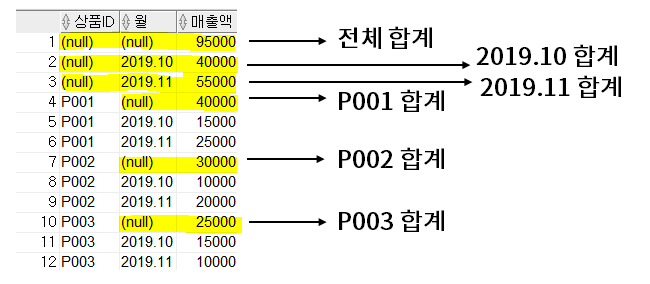

In [331]:
# 그룹화 > 소계

emp.groupBy('deptno', 'job').agg(count('*'), sum('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [335]:
emp.rollup('deptno', 'job').agg(count('*'), sum('sal')).orderBy('deptno','job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|  null|     null|      15|   32225|
|    10|     null|       3|    8750|
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|     null|       5|   10875|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|     null|       6|    9400|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|     null|       1|    3200|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [336]:
emp.cube('deptno', 'job').agg(count('*'), sum('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|sum(sal)|
+------+---------+--------+--------+
|  null|     null|      15|   32225|
|  null|  ANALYST|       2|    6000|
|  null|    CLERK|       5|    7350|
|  null|  MANAGER|       3|    8275|
|  null|PRESIDENT|       1|    5000|
|  null| SALESMAN|       4|    5600|
|    10|     null|       3|    8750|
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|     null|       5|   10875|
|    20|  ANALYST|       2|    6000|
|    20|    CLERK|       2|    1900|
|    20|  MANAGER|       1|    2975|
|    30|     null|       6|    9400|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    5600|
|    70|     null|       1|    3200|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+



In [345]:
# 최대 최소 ROLLUP
emp.rollup('deptno','job').agg(max('sal').alias('max_sal'), min('sal').alias('min_sal')).orderBy('deptno','job').show()

+------+---------+-------+-------+
|deptno|      job|max_sal|min_sal|
+------+---------+-------+-------+
|  null|     null|   5000|    800|
|    10|     null|   5000|   1300|
|    10|    CLERK|   1300|   1300|
|    10|  MANAGER|   2450|   2450|
|    10|PRESIDENT|   5000|   5000|
|    20|     null|   3000|    800|
|    20|  ANALYST|   3000|   3000|
|    20|    CLERK|   1100|    800|
|    20|  MANAGER|   2975|   2975|
|    30|     null|   2850|    950|
|    30|    CLERK|    950|    950|
|    30|  MANAGER|   2850|   2850|
|    30| SALESMAN|   1600|   1250|
|    70|     null|   3200|   3200|
|    70|    CLERK|   3200|   3200|
+------+---------+-------+-------+



### SQL 문
```
SELECT
    deptno, job,
    max(sal) as max_sal,
    min(sal) as min_sal,

from emp

group by rollup(deptno, job)
order by deptno, job;
```



In [343]:
emp.cube('deptno','job').agg(count('*'), max('sal')).orderBy('deptno', 'job').show()
emp.cube('deptno','job').agg(count('*'), min('sal')).orderBy('deptno', 'job').show()

+------+---------+--------+--------+
|deptno|      job|count(1)|max(sal)|
+------+---------+--------+--------+
|  null|     null|      15|    5000|
|  null|  ANALYST|       2|    3000|
|  null|    CLERK|       5|    3200|
|  null|  MANAGER|       3|    2975|
|  null|PRESIDENT|       1|    5000|
|  null| SALESMAN|       4|    1600|
|    10|     null|       3|    5000|
|    10|    CLERK|       1|    1300|
|    10|  MANAGER|       1|    2450|
|    10|PRESIDENT|       1|    5000|
|    20|     null|       5|    3000|
|    20|  ANALYST|       2|    3000|
|    20|    CLERK|       2|    1100|
|    20|  MANAGER|       1|    2975|
|    30|     null|       6|    2850|
|    30|    CLERK|       1|     950|
|    30|  MANAGER|       1|    2850|
|    30| SALESMAN|       4|    1600|
|    70|     null|       1|    3200|
|    70|    CLERK|       1|    3200|
+------+---------+--------+--------+

+------+---------+--------+--------+
|deptno|      job|count(1)|min(sal)|
+------+---------+--------+--------+


In [393]:
# job별 평균 급여
emp.rollup('deptno','job')\
.agg(count('*')
     , round(avg('sal'),2).alias('avg_salary')
     , sum('sal').alias('sum_sal')
     , count('sal').alias('count_sal')
     , round((sum('sal') / count('sal')),2).alias('avg_test')
    )\
.orderBy('deptno', 'job')\
.select('job', 'avg_salary', 'sum_sal', 'count_sal', 'avg_test')\
.select(expr('*'), col('avg_salary') == col('avg_test'))\
.show()


+---------+----------+-------+---------+--------+-----------------------+
|      job|avg_salary|sum_sal|count_sal|avg_test|(avg_salary = avg_test)|
+---------+----------+-------+---------+--------+-----------------------+
|     null|   2148.33|  32225|       15| 2148.33|                   true|
|     null|   2916.67|   8750|        3| 2916.67|                   true|
|    CLERK|    1300.0|   1300|        1|  1300.0|                   true|
|  MANAGER|    2450.0|   2450|        1|  2450.0|                   true|
|PRESIDENT|    5000.0|   5000|        1|  5000.0|                   true|
|     null|    2175.0|  10875|        5|  2175.0|                   true|
|  ANALYST|    3000.0|   6000|        2|  3000.0|                   true|
|    CLERK|     950.0|   1900|        2|   950.0|                   true|
|  MANAGER|    2975.0|   2975|        1|  2975.0|                   true|
|     null|   1566.67|   9400|        6| 1566.67|                   true|
|    CLERK|     950.0|    950|        

In [372]:
#deptno, job 평균급여, 최대 급여를 모두 소계 내기 - cube
emp.cube('deptno', 'job')\
    .agg(count('*')
         , round(avg('sal'),2).alias('avg_sal')
         , max('sal').alias('max_sal'))\
    .orderBy('deptno', 'job')\
    .select('deptno', 'job', 'avg_sal', 'max_sal')\
    .show()

+------+---------+-------+-------+
|deptno|      job|avg_sal|max_sal|
+------+---------+-------+-------+
|  null|     null|2148.33|   5000|
|  null|  ANALYST| 3000.0|   3000|
|  null|    CLERK| 1470.0|   3200|
|  null|  MANAGER|2758.33|   2975|
|  null|PRESIDENT| 5000.0|   5000|
|  null| SALESMAN| 1400.0|   1600|
|    10|     null|2916.67|   5000|
|    10|    CLERK| 1300.0|   1300|
|    10|  MANAGER| 2450.0|   2450|
|    10|PRESIDENT| 5000.0|   5000|
|    20|     null| 2175.0|   3000|
|    20|  ANALYST| 3000.0|   3000|
|    20|    CLERK|  950.0|   1100|
|    20|  MANAGER| 2975.0|   2975|
|    30|     null|1566.67|   2850|
|    30|    CLERK|  950.0|    950|
|    30|  MANAGER| 2850.0|   2850|
|    30| SALESMAN| 1400.0|   1600|
|    70|     null| 3200.0|   3200|
|    70|    CLERK| 3200.0|   3200|
+------+---------+-------+-------+



In [395]:
sc.stop()

### 작성하다만 코드

In [141]:
df6 = df5.where('count < 10')
df6.show()

+--------------------+-------------------+-----+-------------+--------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+--------------------+-------------------+-----+-------------+--------+
|       United States|            Croatia|    1|        false|   under|
|       United States|          Singapore|    1|        false|   under|
|             Moldova|      United States|    1|        false|   under|
|               Malta|      United States|    1|        false|   under|
|       United States|           Paraguay|    6|        false|   under|
|             Algeria|      United States|    4|        false|   under|
|       United States|          Gibraltar|    1|        false|   under|
|Saint Vincent and...|      United States|    1|        false|   under|
|            Suriname|      United States|    1|        false|   under|
|       United States|             Cyprus|    1|        false|   under|
|       United States|           Malaysia|    3|        false|  

In [142]:
df6.count()

48

In [144]:
df5.where('count > 1 and count < 10').show()

+-----------------+-------------------+-----+-------------+--------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+-----------------+-------------------+-----+-------------+--------+
|    United States|           Paraguay|    6|        false|   under|
|          Algeria|      United States|    4|        false|   under|
|    United States|           Malaysia|    3|        false|   under|
|         Thailand|      United States|    3|        false|   under|
|          Liberia|      United States|    2|        false|   under|
|          Hungary|      United States|    2|        false|   under|
|    United States|            Vietnam|    2|        false|   under|
|    United States|            Hungary|    3|        false|   under|
|         Malaysia|      United States|    2|        false|   under|
|    United States|           Thailand|    4|        false|   under|
|          Croatia|      United States|    2|        false|   under|
|    United States|            Lib

In [150]:
df5.where('count < 5').where("ORIGIN_COUNTRY_NAME != 'United States'").show()

+-----------------+-------------------+-----+-------------+--------+
|DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+-----------------+-------------------+-----+-------------+--------+
|    United States|            Croatia|    1|        false|   under|
|    United States|          Singapore|    1|        false|   under|
|    United States|          Gibraltar|    1|        false|   under|
|    United States|             Cyprus|    1|        false|   under|
|    United States|           Malaysia|    3|        false|   under|
|    United States|            Vietnam|    2|        false|   under|
|    United States|            Estonia|    1|        false|   under|
|    United States|            Hungary|    3|        false|   under|
|    United States|           Thailand|    4|        false|   under|
|    United States|            Liberia|    2|        false|   under|
|    United States|              Malta|    2|        false|   under|
|    United States|          Lithu

In [192]:
from pyspark.sql.functions import expr, count
df5 \
.withColumn('country_first', expr(
                            'left(ORIGIN_COUNTRY_NAME, 1)'    
                                )
           ) \
.groupBy('country_first') \
.agg(count('*').alias('counting')) \
.orderBy('counting') \
.show()

+-------------+--------+
|country_first|counting|
+-------------+--------+
|            Q|       1|
|            V|       2|
|            R|       2|
|            K|       2|
|            D|       3|
|            J|       3|
|            L|       4|
|            H|       4|
|            F|       5|
|            E|       5|
|            I|       6|
|            N|       6|
|            T|       6|
|            M|       7|
|            A|       8|
|            P|       9|
|            G|      10|
|            B|      10|
|            C|      13|
|            S|      14|
+-------------+--------+
only showing top 20 rows



In [219]:
df5.show()

+--------------------+-------------------+-----+-------------+--------+
|   DEST_COUNTRY_NAME|ORIGIN_COUNTRY_NAME|count|withInCountry|category|
+--------------------+-------------------+-----+-------------+--------+
|       United States|            Romania|   15|        false|   upper|
|       United States|            Croatia|    1|        false|   under|
|       United States|            Ireland|  344|        false|   upper|
|               Egypt|      United States|   15|        false|   upper|
|       United States|              India|   62|        false|   upper|
|       United States|          Singapore|    1|        false|   under|
|       United States|            Grenada|   62|        false|   upper|
|          Costa Rica|      United States|  588|        false|   upper|
|             Senegal|      United States|   40|        false|   upper|
|             Moldova|      United States|    1|        false|   under|
|       United States|       Sint Maarten|  325|        false|  

In [57]:
test_df = sc.read.format('csv').load('data/fhvhv_tripdata_2020-03.csv', header = True)
test_df.schema

StructType(List(StructField(hvfhs_license_num,StringType,true),StructField(dispatching_base_num,StringType,true),StructField(pickup_datetime,StringType,true),StructField(dropoff_datetime,StringType,true),StructField(PULocationID,StringType,true),StructField(DOLocationID,StringType,true),StructField(SR_Flag,StringType,true)))

In [61]:
test_df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropoff_datetime: string (nullable = true)
 |-- PULocationID: string (nullable = true)
 |-- DOLocationID: string (nullable = true)
 |-- SR_Flag: string (nullable = true)



In [92]:
sc.stop()